In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [120]:
df = pd.read_csv('hop_stats.csv', skip_blank_lines=True)
df_all = pd.read_csv('hop_stats_all_vocab.csv', skip_blank_lines=True)

df_all.head()

,start_article_title,starter_article_url,selection_strat,hops_to_phil
0,Bill Moore (pitcher),https://en.wikipedia.org/wiki/Bill_Moore_(pitc...,EMBEDDING_WORD2VEC,8
1,Manuel Silva (basketball),https://en.wikipedia.org/wiki/Manuel_Silva_(ba...,WORDNET,6
2,Jeanne d'Ussel,https://en.wikipedia.org/wiki/Jeanne_d%27Ussel,EMBEDDING_WORD2VEC,6
3,Various Artists – Archives Vol. 4,https://en.wikipedia.org/wiki/Various_Artists_...,WORDNET,12
4,Marcus Aurelius Marius,https://en.wikipedia.org/wiki/Marcus_Aurelius_...,WORDNET,5


In [121]:
print(df.describe())
print(df_all.describe())

       hops_to_phil
count    873.000000
mean      12.100802
std        9.101437
min        1.000000
25%        7.000000
50%        9.000000
75%       17.000000
max      100.000000
       hops_to_phil
count   1272.000000
mean      16.867925
std       13.422383
min        2.000000
25%        7.000000
50%       11.000000
75%       22.000000
max       51.000000


In [122]:
# display mean and std for each selection strategy

def get_hop_stats(df_in, strats):
    df_stats = pd.DataFrame(columns=['selection', 'mean', 'std', 'count'])
    for s in strats:
        df_sel = df_in[df_in['selection_strat'] == s]
        df_stats = pd.concat([
            df_stats, 
            pd.DataFrame([
                [
                    s, 
                    df_sel['hops_to_phil'].mean(), 
                    df_sel['hops_to_phil'].std(), 
                    df_sel['hops_to_phil'].count()
                ]
            ],
            columns=['selection', 'mean', 'std', 'count'])])

    # order by mean
    df_stats = df_stats.sort_values(by=['mean'])

    return df_stats

In [123]:
get_hop_stats(df, df['selection_strat'].unique())

,selection,mean,std,count
0,EMBEDDING_WORD2VEC,7.278351,2.729440,291
0,WORDNET,8.061856,3.154027,291
0,NTH_LINK(1),20.138889,6.955920,288
0,RANDOM,100.000000,0.000000,3


In [124]:
get_hop_stats(df_all, df_all['selection_strat'].unique())

,selection,mean,std,count
0,EMBEDDING_WORD2VEC,7.249211,2.623719,317
0,WORDNET,7.705085,2.688690,295
0,EMBEDDING_BERT,9.118280,5.151719,93
0,NTH_LINK(1),12.750000,3.774917,4
0,NTH_LINK(2),28.394316,12.488462,563


In [125]:
# plot boxplots for each selection strategy

def boxplot(dataf):
    sns.set(style="whitegrid")
    sns.boxplot(x="selection_strat", y="hops_to_phil", data=dataf)
    # set x axis labels to be vertical
    plt.xticks(rotation=90)
    # rename x axis labels
    plt.xlabel('Selection Strategy')
    plt.ylabel('Hops to Phil')
    plt.title('Hops to Phil for each Selection Strategy')
    plt.show()



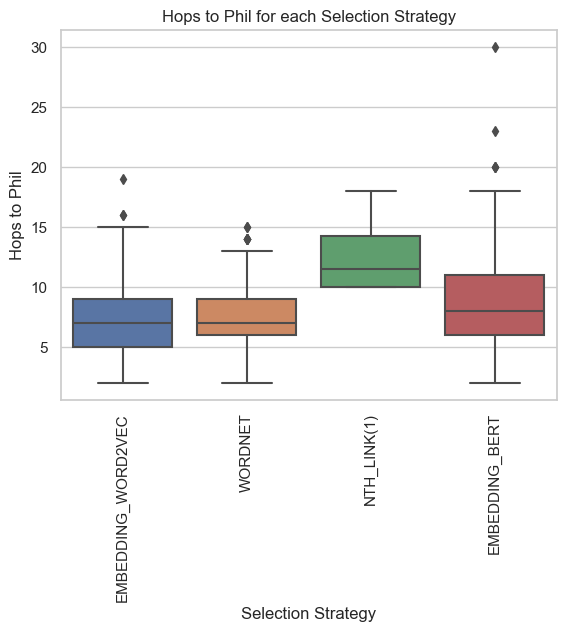

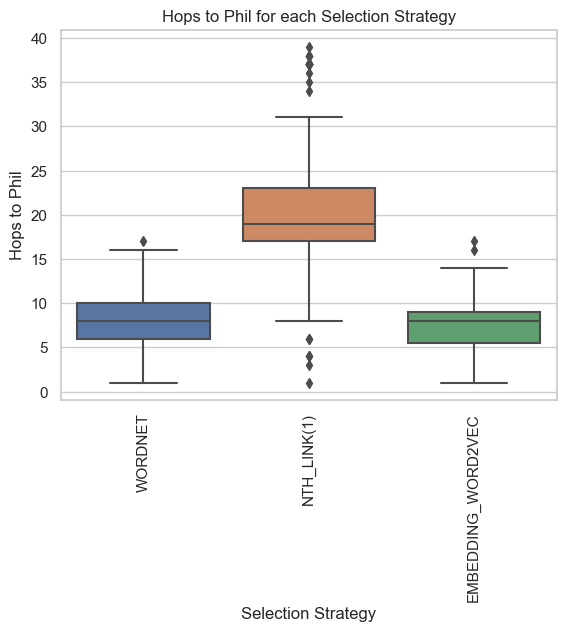

In [126]:
boxplot(df_all[df_all['selection_strat'] != 'NTH_LINK(2)'])
boxplot(df[df['selection_strat'] != 'RANDOM'])